(657, 900)
2024-10-19 13:30:29,630 [INFO] normalizing data across axis=1
2024-10-19 13:30:29,633 [INFO] projecting out mean along axis=0
2024-10-19 13:30:29,639 [INFO] data normalized, 0.01sec
2024-10-19 13:30:29,640 [INFO] sorting activity: 657 valid samples by 900 timepoints
2024-10-19 13:30:31,019 [INFO] n_PCs = 200 computed, 1.39sec
2024-10-19 13:30:31,180 [INFO] 50 clusters computed, time 1.55sec
2024-10-19 13:30:31,525 [INFO] clusters sorted, time 1.90sec
2024-10-19 13:30:31,600 [INFO] clusters upsampled, time 1.97sec
2024-10-19 13:30:31,609 [INFO] rastermap complete, time 1.98sec


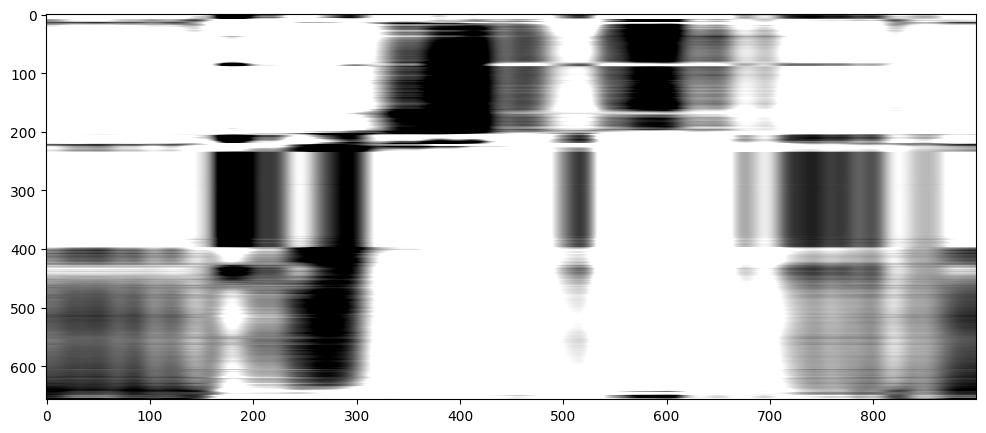

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from rastermap import Rastermap
from scipy.ndimage import gaussian_filter1d


# spks is neurons by time
spks = np.load("/home/maria/NeuroGarage/pipeline/fisher_weights/firing_rates_0.npy").T.astype("float32")
print(spks.shape)
sigma = 10.0  # You can experiment with different values, e.g., 1.0, 2.0, etc.

# Apply Gaussian smoothing along the time axis (axis=1) for each neuron.
spks_smoothed = gaussian_filter1d(spks, sigma=sigma, axis=1)
# fit rastermap
model = Rastermap(n_PCs=200, n_clusters=50, 
                  locality=0.1, time_lag_window=50).fit(spks_smoothed)
y = model.embedding # neurons x 1
isort = model.isort

# visualize binning over neurons
X_embedding = model.X_embedding

# plot
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.imshow(X_embedding, vmin=0, vmax=1.5, cmap="gray_r", aspect="auto")

2024-10-19 13:22:51,918 [INFO] normalizing data across axis=1
2024-10-19 13:22:51,920 [INFO] projecting out mean along axis=0


2024-10-19 13:22:51,922 [INFO] data normalized, 0.00sec
2024-10-19 13:22:51,922 [INFO] sorting activity: 508 valid samples by 900 timepoints
2024-10-19 13:22:53,677 [INFO] n_PCs = 200 computed, 1.76sec
2024-10-19 13:22:53,818 [INFO] 50 clusters computed, time 1.90sec
2024-10-19 13:22:54,153 [INFO] clusters sorted, time 2.24sec
2024-10-19 13:22:54,205 [INFO] clusters upsampled, time 2.29sec
2024-10-19 13:22:54,212 [INFO] rastermap complete, time 2.29sec


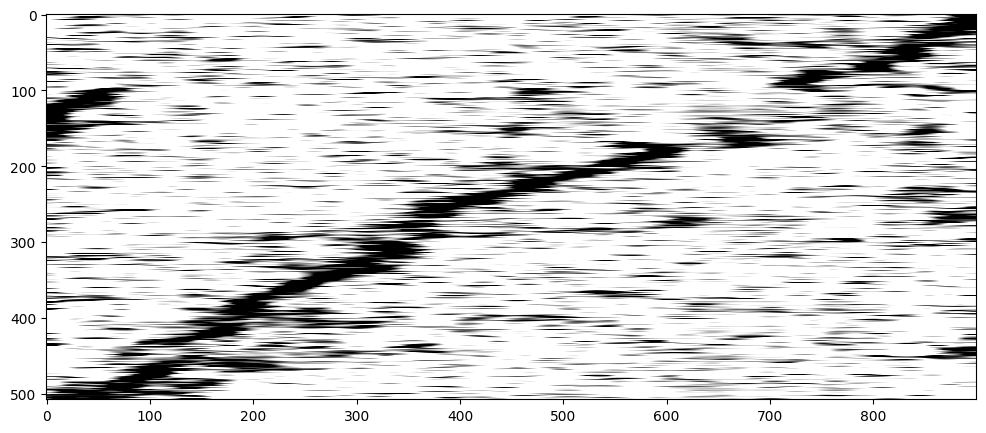

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from rastermap import Rastermap
from scipy.ndimage import gaussian_filter1d

# spks is neurons by time
spks = np.load("/home/maria/NeuroGarage/pipeline/fisher_weights/spikes_0.npy").T.astype("float32")

# Create a boolean mask where True indicates rows that are not all zeros
non_zero_mask = ~(spks == 0).all(axis=1)

# Apply the mask to filter out rows where all elements are zero
spks_filtered = spks[non_zero_mask]
sigma = 10.0  # You can experiment with different values, e.g., 1.0, 2.0, etc.

# Apply Gaussian smoothing along the time axis (axis=1) for each neuron.
spks_smoothed = gaussian_filter1d(spks_filtered, sigma=sigma, axis=1)

# fit rastermap
model = Rastermap(n_PCs=200, n_clusters=50, 
                  locality=0.1, time_lag_window=50).fit(spks_smoothed)
y = model.embedding # neurons x 1
isort = model.isort

# visualize binning over neurons
X_embedding = model.X_embedding

# plot
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.imshow(X_embedding, vmin=0, vmax=1.5, cmap="gray_r", aspect="auto")

(508, 900)


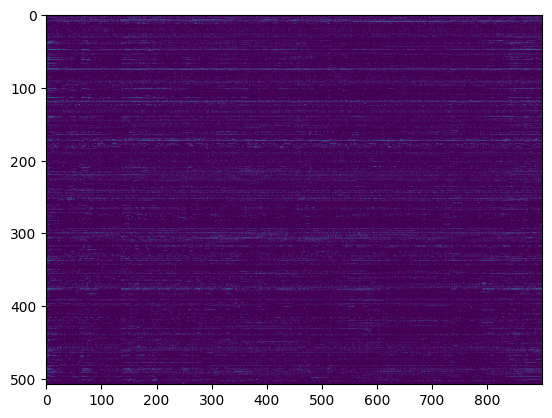

In [17]:
print(spks_filtered.shape)  
plt.imshow(spks_filtered, aspect="auto") 

2024-10-19 13:29:26,111 [INFO] normalizing data across axis=1
2024-10-19 13:29:26,113 [INFO] projecting out mean along axis=0
2024-10-19 13:29:26,116 [INFO] data normalized, 0.00sec
2024-10-19 13:29:26,116 [INFO] sorting activity: 507 valid samples by 900 timepoints
2024-10-19 13:29:28,406 [INFO] n_PCs = 200 computed, 2.30sec
2024-10-19 13:29:28,558 [INFO] 50 clusters computed, time 2.45sec
2024-10-19 13:29:28,908 [INFO] clusters sorted, time 2.80sec
2024-10-19 13:29:28,978 [INFO] clusters upsampled, time 2.87sec
2024-10-19 13:29:28,984 [INFO] rastermap complete, time 2.87sec


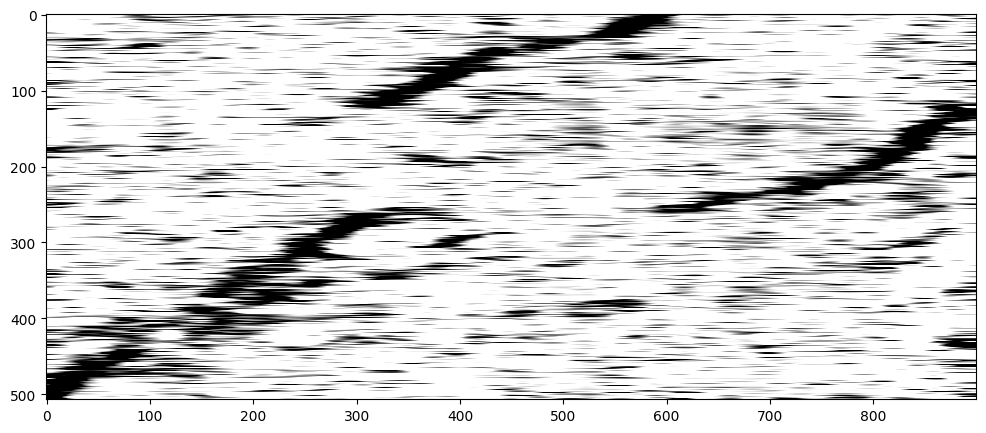

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from rastermap import Rastermap
from scipy.ndimage import gaussian_filter1d

# spks is neurons by time
spks = np.load("/home/maria/NeuroGarage/pipeline/fisher_weights/spikes_1.npy").T.astype("float32")

# Create a boolean mask where True indicates rows that are not all zeros
non_zero_mask = ~(spks == 0).all(axis=1)

# Apply the mask to filter out rows where all elements are zero
spks_filtered = spks[non_zero_mask]
sigma = 10.0  # You can experiment with different values, e.g., 1.0, 2.0, etc.

# Apply Gaussian smoothing along the time axis (axis=1) for each neuron.
spks_smoothed = gaussian_filter1d(spks_filtered, sigma=sigma, axis=1)

# fit rastermap
model = Rastermap(n_PCs=200, n_clusters=50, 
                  locality=0.1, time_lag_window=50).fit(spks_smoothed)
y = model.embedding # neurons x 1
isort = model.isort

# visualize binning over neurons
X_embedding = model.X_embedding

# plot
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.imshow(X_embedding, vmin=0, vmax=1.5, cmap="gray_r", aspect="auto")

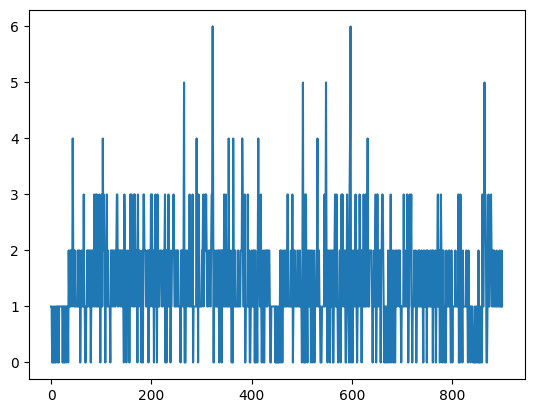

In [18]:
plt.plot(spks_filtered[0])

2024-10-19 13:43:08,213 [INFO] normalizing data across axis=1
2024-10-19 13:43:08,215 [INFO] projecting out mean along axis=0
2024-10-19 13:43:08,218 [INFO] data normalized, 0.00sec
2024-10-19 13:43:08,219 [INFO] sorting activity: 508 valid samples by 900 timepoints
2024-10-19 13:43:09,143 [INFO] n_PCs = 200 computed, 0.93sec
2024-10-19 13:43:09,286 [INFO] 50 clusters computed, time 1.07sec
2024-10-19 13:43:09,615 [INFO] clusters sorted, time 1.40sec
2024-10-19 13:43:09,661 [INFO] clusters upsampled, time 1.45sec
2024-10-19 13:43:09,667 [INFO] rastermap complete, time 1.45sec
(508,)


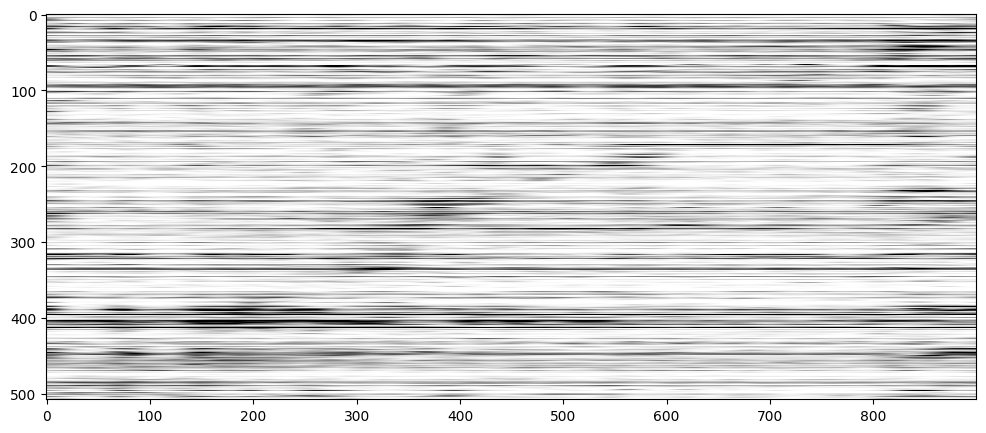

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from rastermap import Rastermap
from scipy.ndimage import gaussian_filter1d

import numpy as np
import matplotlib.pyplot as plt
from rastermap import Rastermap
from scipy.ndimage import gaussian_filter1d

# spks is neurons by time
spks = np.load("/home/maria/NeuroGarage/pipeline/fisher_weights/spikes_0.npy").T.astype("float32")

# Create a boolean mask where True indicates rows that are not all zeros
non_zero_mask = ~(spks == 0).all(axis=1)

# Apply the mask to filter out rows where all elements are zero
spks_filtered = spks[non_zero_mask]
sigma = 10.0  # You can experiment with different values, e.g., 1.0, 2.0, etc.

# Apply Gaussian smoothing along the time axis (axis=1) for each neuron.
spks_smoothed = gaussian_filter1d(spks_filtered, sigma=sigma, axis=1)

# fit rastermap
model = Rastermap(n_PCs=200, n_clusters=50, 
                  locality=0.1, time_lag_window=50).fit(spks_smoothed)
y = model.embedding # neurons x 1
isort = model.isort

# visualize binning over neurons
X_embedding = model.X_embedding

# spks is neurons by time
spks = np.load("/home/maria/NeuroGarage/pipeline/fisher_weights/spikes_1.npy").T.astype("float32")

# Create a boolean mask where True indicates rows that are not all zero
spks_filtered = spks[non_zero_mask]
spks_smoothed = gaussian_filter1d(spks_filtered, sigma=sigma, axis=1)
print(isort.shape)
# visualize binning over neurons
X_embedding = spks_smoothed[isort]

# plot
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.imshow(X_embedding, vmin=0, vmax=1.5, cmap="gray_r", aspect="auto")

2024-10-19 14:03:43,123 [INFO] normalizing data across axis=1
2024-10-19 14:03:43,125 [INFO] projecting out mean along axis=0
2024-10-19 14:03:43,127 [INFO] data normalized, 0.00sec
2024-10-19 14:03:43,128 [INFO] sorting activity: 508 valid samples by 900 timepoints
2024-10-19 14:03:44,073 [INFO] n_PCs = 200 computed, 0.95sec
2024-10-19 14:03:44,254 [INFO] 50 clusters computed, time 1.13sec
2024-10-19 14:03:44,583 [INFO] clusters sorted, time 1.46sec
2024-10-19 14:03:44,653 [INFO] clusters upsampled, time 1.53sec
2024-10-19 14:03:44,660 [INFO] rastermap complete, time 1.54sec


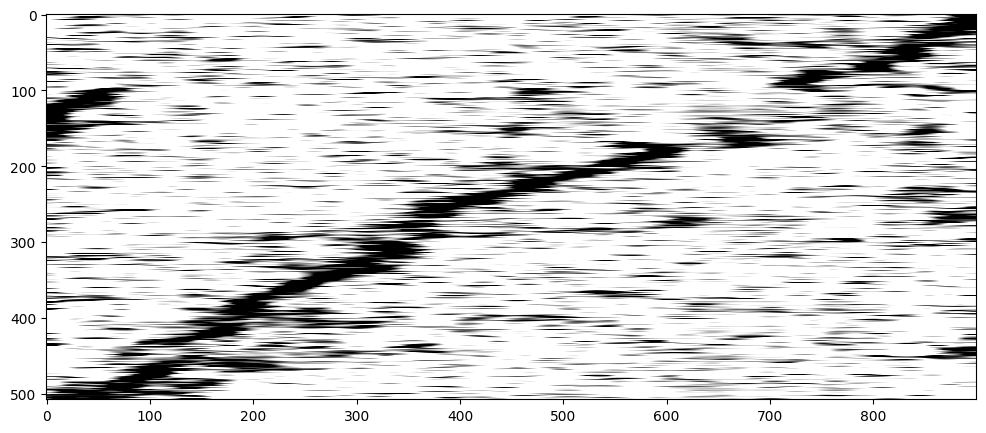

2024-10-19 14:03:44,893 [INFO] normalizing data across axis=1
2024-10-19 14:03:44,895 [INFO] projecting out mean along axis=0
2024-10-19 14:03:44,899 [INFO] data normalized, 0.01sec
2024-10-19 14:03:44,900 [INFO] sorting activity: 507 valid samples by 900 timepoints
2024-10-19 14:03:46,256 [INFO] n_PCs = 200 computed, 1.36sec
2024-10-19 14:03:46,405 [INFO] 50 clusters computed, time 1.51sec
2024-10-19 14:03:46,751 [INFO] clusters sorted, time 1.86sec
2024-10-19 14:03:46,805 [INFO] clusters upsampled, time 1.91sec
2024-10-19 14:03:46,811 [INFO] rastermap complete, time 1.92sec


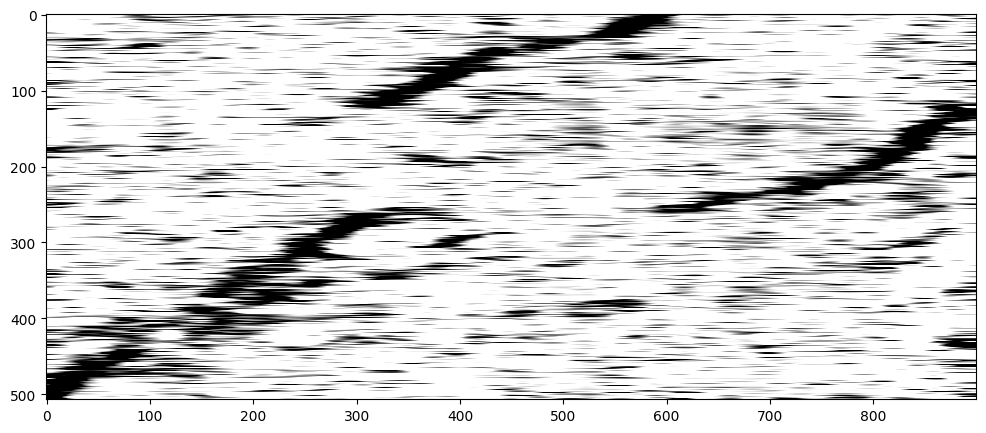

2024-10-19 14:03:47,025 [INFO] normalizing data across axis=1
2024-10-19 14:03:47,027 [INFO] projecting out mean along axis=0
2024-10-19 14:03:47,030 [INFO] data normalized, 0.01sec
2024-10-19 14:03:47,031 [INFO] sorting activity: 505 valid samples by 900 timepoints
2024-10-19 14:03:48,405 [INFO] n_PCs = 200 computed, 1.38sec
2024-10-19 14:03:48,569 [INFO] 50 clusters computed, time 1.54sec
2024-10-19 14:03:48,976 [INFO] clusters sorted, time 1.95sec
2024-10-19 14:03:49,037 [INFO] clusters upsampled, time 2.01sec
2024-10-19 14:03:49,043 [INFO] rastermap complete, time 2.02sec


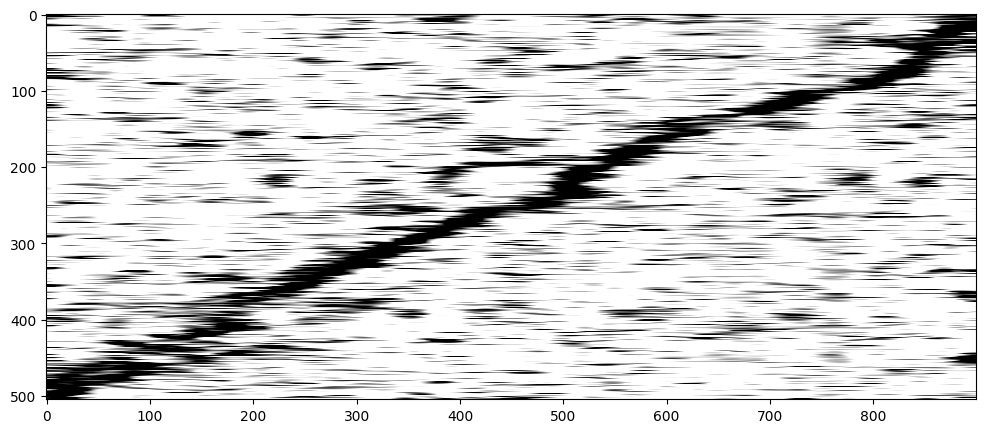

2024-10-19 14:03:49,317 [INFO] normalizing data across axis=1
2024-10-19 14:03:49,318 [INFO] projecting out mean along axis=0
2024-10-19 14:03:49,321 [INFO] data normalized, 0.00sec
2024-10-19 14:03:49,321 [INFO] sorting activity: 506 valid samples by 900 timepoints
2024-10-19 14:03:50,992 [INFO] n_PCs = 200 computed, 1.68sec
2024-10-19 14:03:51,106 [INFO] 50 clusters computed, time 1.79sec
2024-10-19 14:03:51,450 [INFO] clusters sorted, time 2.13sec
2024-10-19 14:03:51,520 [INFO] clusters upsampled, time 2.20sec
2024-10-19 14:03:51,528 [INFO] rastermap complete, time 2.21sec


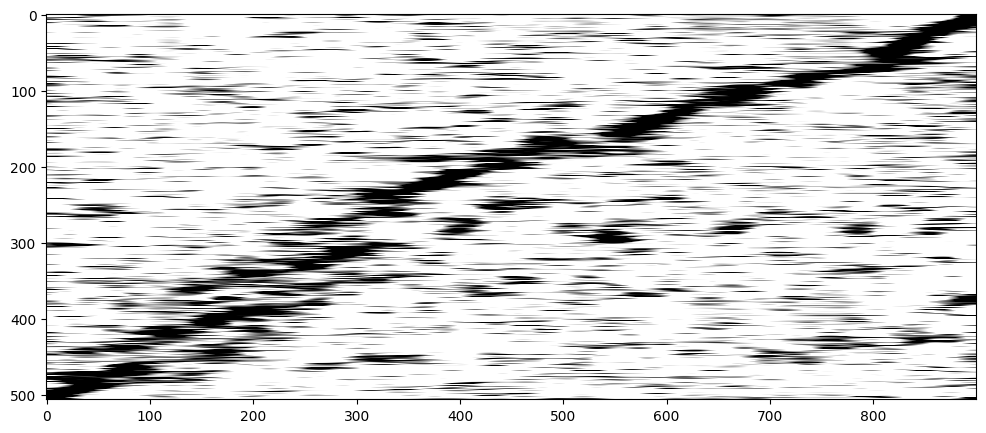

2024-10-19 14:03:51,768 [INFO] normalizing data across axis=1
2024-10-19 14:03:51,771 [INFO] projecting out mean along axis=0
2024-10-19 14:03:51,773 [INFO] data normalized, 0.01sec
2024-10-19 14:03:51,774 [INFO] sorting activity: 507 valid samples by 900 timepoints
2024-10-19 14:03:53,281 [INFO] n_PCs = 200 computed, 1.51sec
2024-10-19 14:03:53,407 [INFO] 50 clusters computed, time 1.64sec
2024-10-19 14:03:53,716 [INFO] clusters sorted, time 1.95sec
2024-10-19 14:03:53,806 [INFO] clusters upsampled, time 2.04sec
2024-10-19 14:03:53,824 [INFO] rastermap complete, time 2.06sec


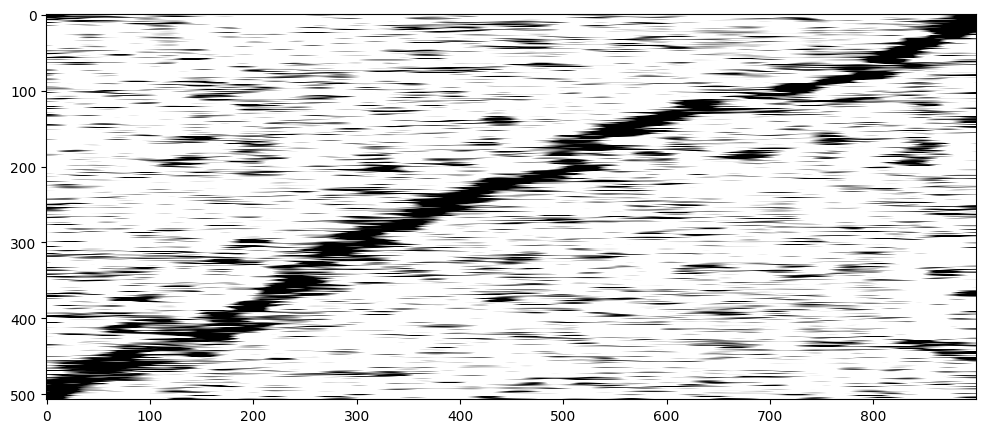

2024-10-19 14:03:54,038 [INFO] normalizing data across axis=1
2024-10-19 14:03:54,040 [INFO] projecting out mean along axis=0
2024-10-19 14:03:54,043 [INFO] data normalized, 0.00sec
2024-10-19 14:03:54,043 [INFO] sorting activity: 508 valid samples by 900 timepoints
2024-10-19 14:03:55,171 [INFO] n_PCs = 200 computed, 1.13sec
2024-10-19 14:03:55,363 [INFO] 50 clusters computed, time 1.33sec
2024-10-19 14:03:55,766 [INFO] clusters sorted, time 1.73sec
2024-10-19 14:03:55,801 [INFO] clusters upsampled, time 1.76sec
2024-10-19 14:03:55,806 [INFO] rastermap complete, time 1.77sec


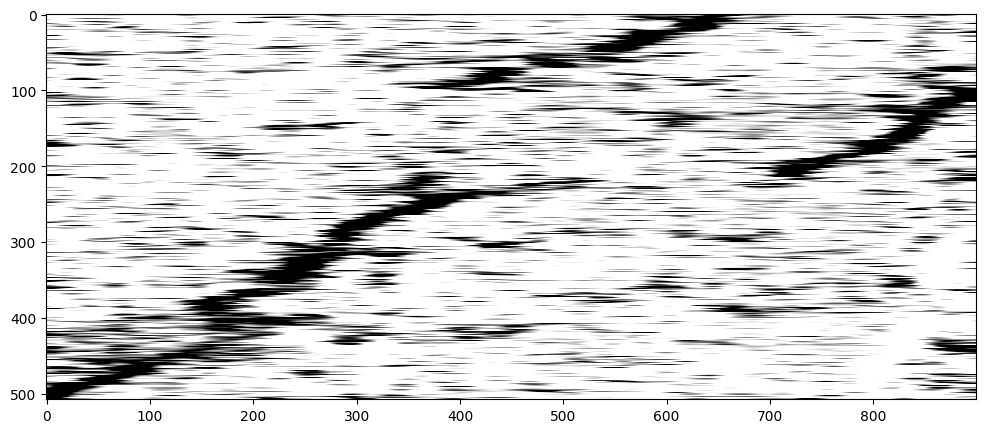

2024-10-19 14:03:56,018 [INFO] normalizing data across axis=1
2024-10-19 14:03:56,020 [INFO] projecting out mean along axis=0
2024-10-19 14:03:56,022 [INFO] data normalized, 0.00sec
2024-10-19 14:03:56,023 [INFO] sorting activity: 510 valid samples by 900 timepoints
2024-10-19 14:03:57,480 [INFO] n_PCs = 200 computed, 1.46sec
2024-10-19 14:03:57,655 [INFO] 50 clusters computed, time 1.64sec
2024-10-19 14:03:57,966 [INFO] clusters sorted, time 1.95sec
2024-10-19 14:03:58,024 [INFO] clusters upsampled, time 2.01sec
2024-10-19 14:03:58,030 [INFO] rastermap complete, time 2.01sec


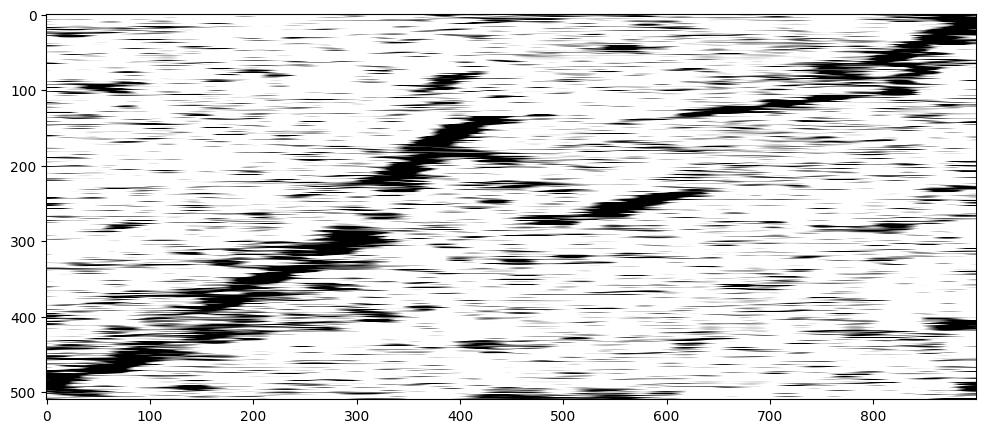

2024-10-19 14:03:58,218 [INFO] normalizing data across axis=1
2024-10-19 14:03:58,220 [INFO] projecting out mean along axis=0
2024-10-19 14:03:58,222 [INFO] data normalized, 0.00sec
2024-10-19 14:03:58,223 [INFO] sorting activity: 509 valid samples by 900 timepoints
2024-10-19 14:03:59,806 [INFO] n_PCs = 200 computed, 1.59sec
2024-10-19 14:03:59,937 [INFO] 50 clusters computed, time 1.72sec
2024-10-19 14:04:00,340 [INFO] clusters sorted, time 2.12sec
2024-10-19 14:04:00,426 [INFO] clusters upsampled, time 2.21sec
2024-10-19 14:04:00,434 [INFO] rastermap complete, time 2.22sec


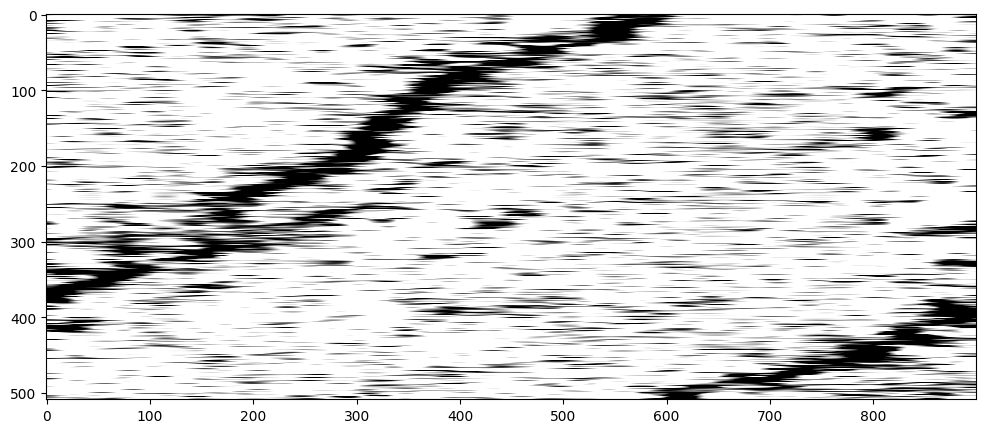

2024-10-19 14:04:00,676 [INFO] normalizing data across axis=1
2024-10-19 14:04:00,678 [INFO] projecting out mean along axis=0
2024-10-19 14:04:00,681 [INFO] data normalized, 0.01sec
2024-10-19 14:04:00,682 [INFO] sorting activity: 506 valid samples by 900 timepoints
2024-10-19 14:04:02,597 [INFO] n_PCs = 200 computed, 1.92sec
2024-10-19 14:04:02,756 [INFO] 50 clusters computed, time 2.08sec
2024-10-19 14:04:03,085 [INFO] clusters sorted, time 2.41sec
2024-10-19 14:04:03,142 [INFO] clusters upsampled, time 2.47sec
2024-10-19 14:04:03,147 [INFO] rastermap complete, time 2.47sec


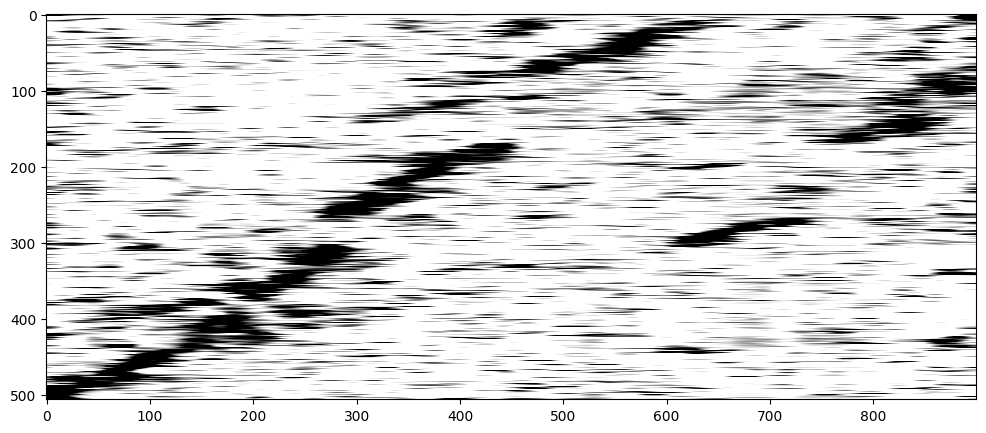

2024-10-19 14:04:03,340 [INFO] normalizing data across axis=1
2024-10-19 14:04:03,342 [INFO] projecting out mean along axis=0
2024-10-19 14:04:03,344 [INFO] data normalized, 0.00sec
2024-10-19 14:04:03,345 [INFO] sorting activity: 504 valid samples by 900 timepoints
2024-10-19 14:04:05,060 [INFO] n_PCs = 200 computed, 1.72sec
2024-10-19 14:04:05,214 [INFO] 50 clusters computed, time 1.87sec
2024-10-19 14:04:05,563 [INFO] clusters sorted, time 2.22sec
2024-10-19 14:04:05,644 [INFO] clusters upsampled, time 2.30sec
2024-10-19 14:04:05,652 [INFO] rastermap complete, time 2.31sec


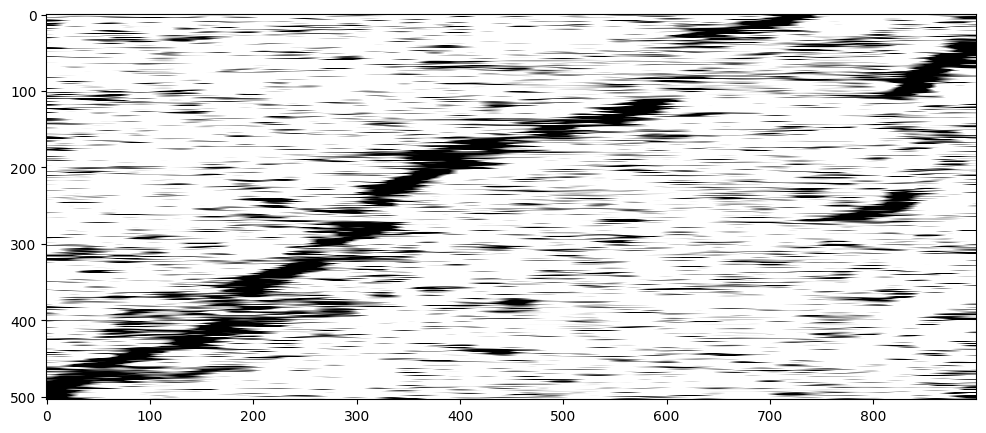

In [34]:
from lib_clean import rastermap_plot

for i in range(0,10):
    rastermap_plot(i)